<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/Sujair/10-Energy/Nb_10_Energy_feature_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving Renewable_Energy_Production_and_Consumption.xlsx to Renewable_Energy_Production_and_Consumption.xlsx


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [4]:
# Read Excel file
df = pd.read_excel("Renewable_Energy_Production_and_Consumption.xlsx")

# Save as CSV
df.to_csv("Renewable_Energy_Production_and_Consumption.csv", index=False)

print("Conversion completed!")

Conversion completed!


In [5]:
df.head(10)

,Country,Year,Total_Energy_Consumed_GWh,Solar_Energy_Produced_GWh,Wind_Energy_Produced_GWh,Hydro_Energy_Produced_GWh,Other_Renewable_Energy_GWh,Non_Renewable_Energy_GWh,CO2_Emissions_Metric_Tons
0,Country_1,2015,285762.2,10402.0,47563.9,39218.1,629.8,18276.5,762386.0
1,Country_1,2016,94908.5,29474.2,49938.8,24416.0,1237.7,51278.9,107060.4
2,Country_1,2017,215680.6,25793.2,19221.1,22064.3,4221.1,194503.8,585307.5
3,Country_1,2018,218026.3,20533.4,15641.4,1540.4,1962.8,196055.3,814390.1
4,Country_1,2019,113048.8,6861.9,43059.4,46401.3,4079.8,134436.3,339605.5
5,Country_2,2015,131187.7,21418.7,49932.0,30562.1,6467.7,177220.3,642962.4
6,Country_2,2016,258699.6,4565.4,31852.4,10954.5,5698.8,50652.7,702010.1
7,Country_2,2017,240451.3,5839.7,39961.9,46060.6,2696.2,194688.0,689522.2
8,Country_2,2018,132274.0,21379.9,39305.5,45831.7,3766.3,37129.1,501264.7
9,Country_2,2019,183489.1,15963.7,18411.6,49470.0,6333.3,29213.8,411920.2


In [11]:
target = "CO2_Emissions_Metric_Tons"
X = df.drop(columns=["Country", target])
y = df[target]
numeric_df = df.drop(columns=["Country"])

In [12]:
df_clean = numeric_df.copy()

XGBoost Model – Test Data
RMSE: 246060.9464
MAE : 202335.2937
R²  : -0.0452



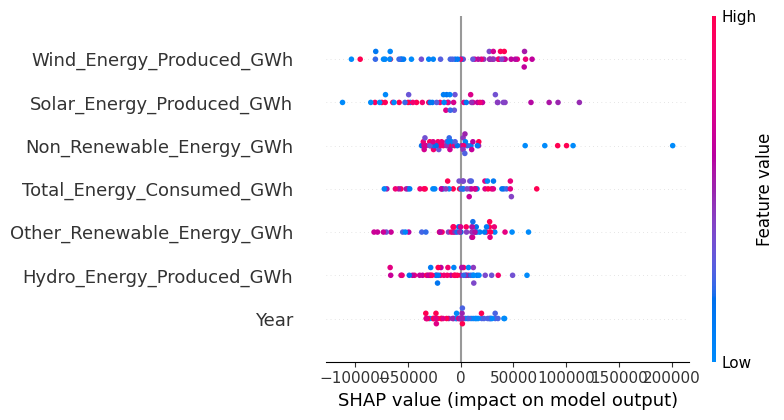

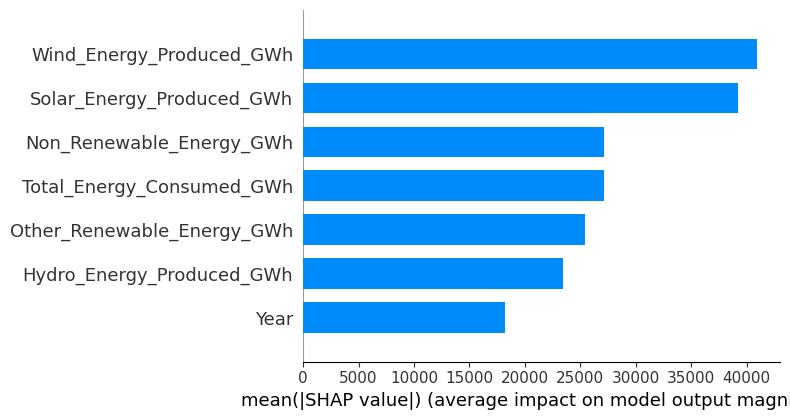

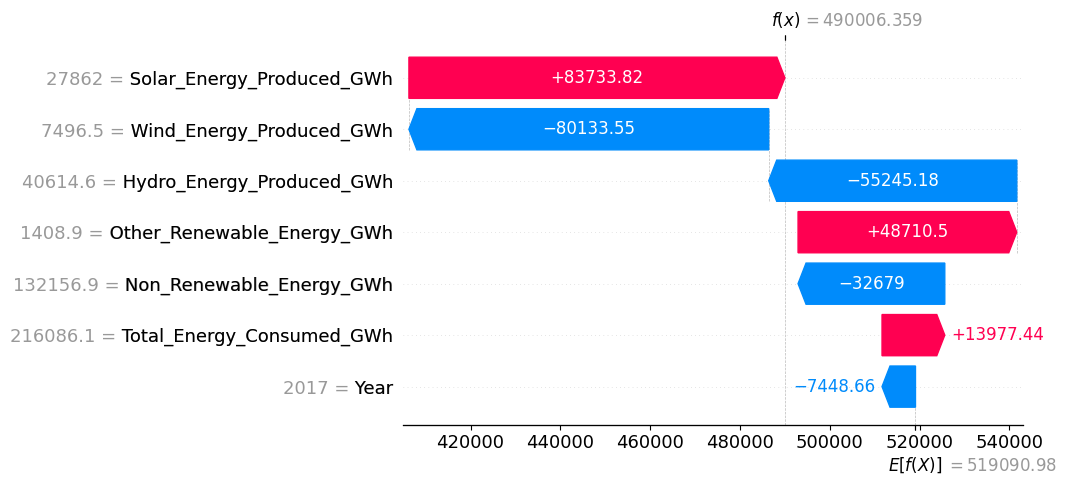

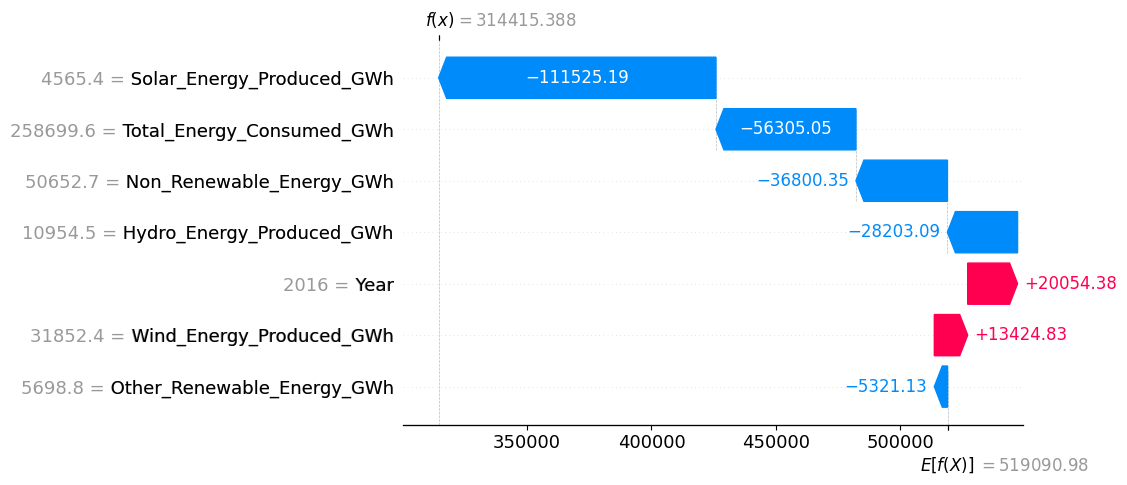

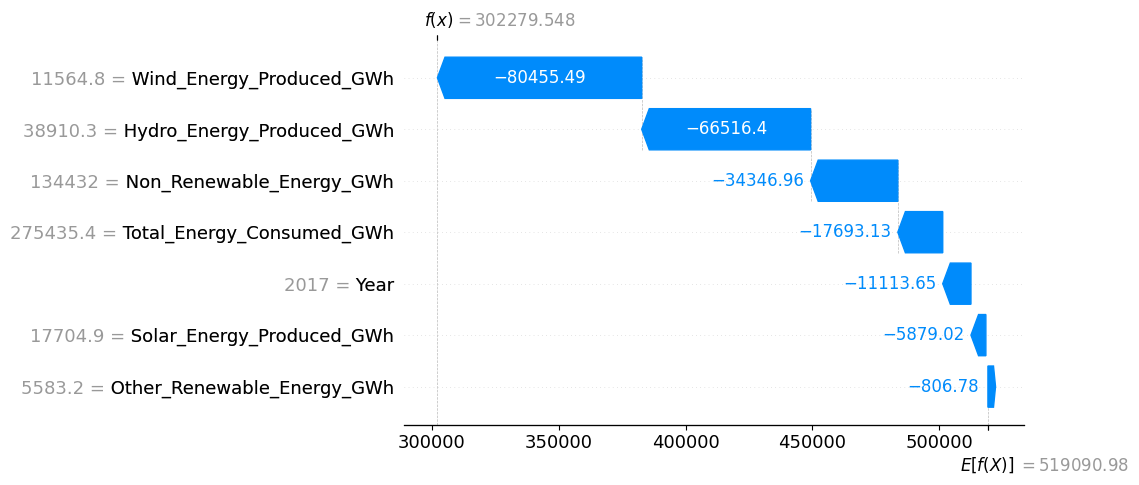

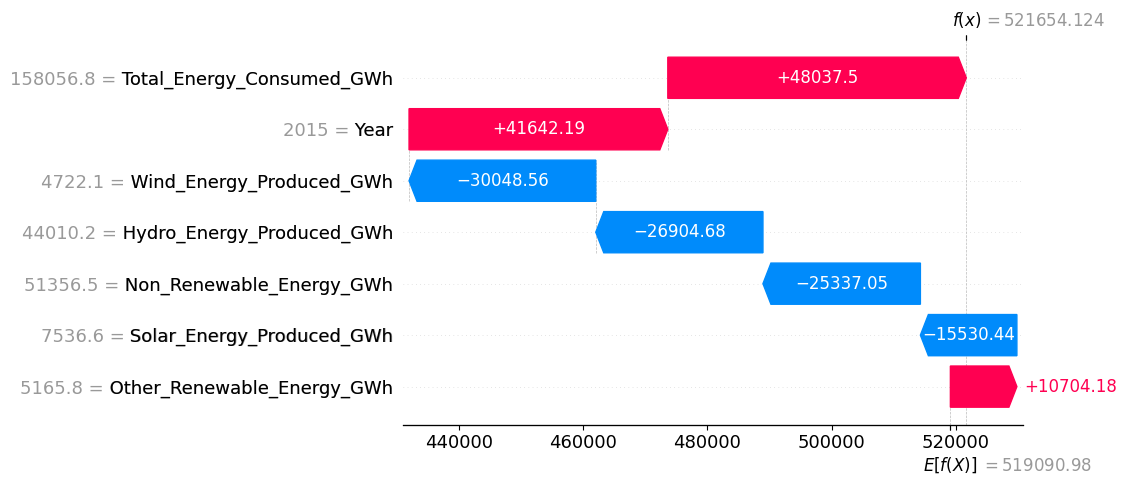

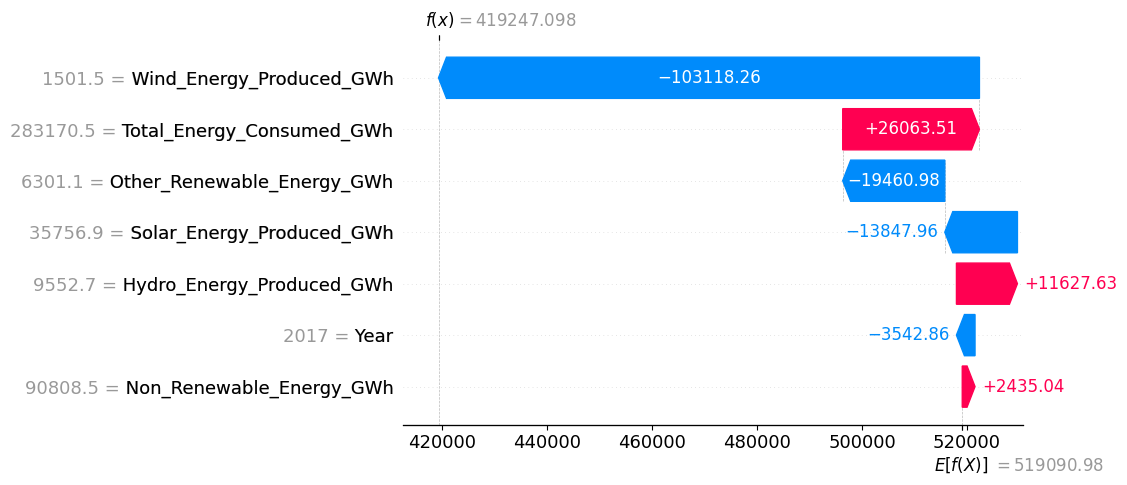

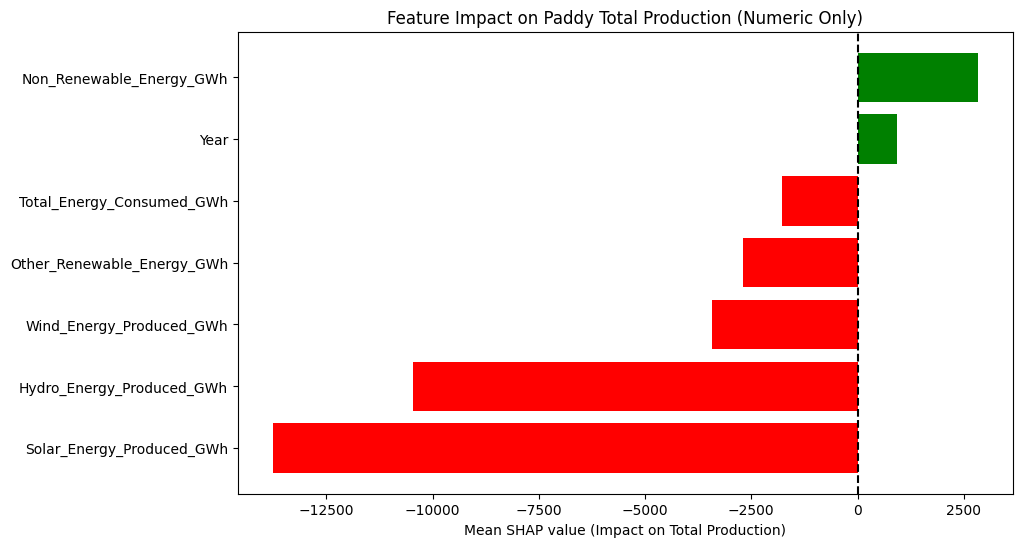

Feature contributions for sample 0
Year: Feature Value = 2017.0, SHAP Value = -7448.661413722039
Total_Energy_Consumed_GWh: Feature Value = 216086.1, SHAP Value = 13977.440847537517
Solar_Energy_Produced_GWh: Feature Value = 27862.0, SHAP Value = 83733.82403948784
Wind_Energy_Produced_GWh: Feature Value = 7496.5, SHAP Value = -80133.55115771771
Hydro_Energy_Produced_GWh: Feature Value = 40614.6, SHAP Value = -55245.17569080591
Other_Renewable_Energy_GWh: Feature Value = 1408.9, SHAP Value = 48710.498270840646
Non_Renewable_Energy_GWh: Feature Value = 132156.9, SHAP Value = -32678.995204262137
Base value: 519090.979756943
Model prediction: 490006.53
Actual value: 706623.6


In [13]:
# 1️⃣ Install packages if needed
!pip install xgboost shap --quiet

# 2️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score






# Fill missing numeric values with median
df_clean = df_clean.fillna(df_clean.median())

# 4️⃣ Prepare data

X = df_clean.drop(columns=[target])  # all numeric features now
y = df_clean[target]

# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6️⃣ Train XGBoost Regressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 7️⃣ Predict on test set
y_pred = model.predict(X_test)

# 8️⃣ Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model – Test Data")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}\n")

# 9️⃣ Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 10️⃣ SHAP summary plot (global feature impact)
shap.summary_plot(shap_values, X_test)

# 11️⃣ SHAP bar plot (average absolute impact)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 12️⃣ Waterfall plot for first 5 test samples
for i in range(min(5, len(X_test))):
    shap.plots.waterfall(shap_values[i])
# 13️⃣ SHAP values DataFrame for further analysis
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df['base_value'] = shap_values.base_values
shap_df['predicted_value'] = y_pred
shap_df['actual_value'] = y_test.values
shap_df.to_csv("shap_values_numeric_paddy.csv", index=False)

# 14️⃣ Horizontal bar plot showing mean SHAP values
mean_shap = shap_df[X_test.columns].mean().sort_values()
plt.figure(figsize=(10,6))
colors = ['red' if val < 0 else 'green' for val in mean_shap]
plt.barh(mean_shap.index, mean_shap.values, color=colors)
plt.xlabel("Mean SHAP value (Impact on Total Production)")
plt.title("Feature Impact on Paddy Total Production (Numeric Only)")
plt.axvline(0, color='black', linestyle='--')
plt.show()

# 15️⃣ Example: Feature contributions for first test sample
sample_index = 0
sample_features = X_test.iloc[sample_index]
sample_shap_values = shap_values.values[sample_index]
print("Feature contributions for sample", sample_index)
for feature, value, shap_val in zip(X_test.columns, sample_features, sample_shap_values):
    print(f"{feature}: Feature Value = {value}, SHAP Value = {shap_val}")
print("Base value:", shap_values.base_values[sample_index])
print("Model prediction:", y_pred[sample_index])
print("Actual value:", y_test.values[sample_index])